In [ ]:
import numpy as np 
import numpy.linalg as nl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as so
import scipy.linalg as sl
#import jax.numpy as jnp
#from jax import grad

import math
import sklearn.datasets

# Polygon Smoothing

Check:[Polygon Smoothing Paper](http://www.cs.cornell.edu/cv/ResearchPDF/PolygonSmoothingPaper.pdf)

In [ ]:
import random 
def vector(N):
    v = []
    for i in range(N-1):
        vi = np.random.randint(99, 999)/1000 * random.choice((-1, 1))
        v.append(vi)
    vi = -np.sum(v)
    v.append(vi)
    return v

In [ ]:
# Testing:
print(vector(6))
np.sum(vector(6))

[-0.772, -0.945, -0.483, 0.57, -0.409, 2.039]


0.0

## Part (a):

In [ ]:
# Initializing x0 and y0:
N = 20
x0 = vector(N)
print("x0:", x0)
print("Sum of x0 entries:", np.sum(x0))
print()
y0 = vector(N)
print("y0:", y0)
print("Sum of y0 entries:", np.sum(y0))

x0: [0.932, -0.532, 0.903, -0.514, 0.455, -0.405, -0.296, -0.994, 0.391, -0.816, 0.376, 0.186, -0.604, -0.684, 0.301, 0.469, 0.903, -0.323, -0.701, 0.9530000000000001]
Sum of x0 entries: 0.0

y0: [0.539, 0.114, -0.583, -0.544, 0.351, 0.861, -0.243, -0.993, 0.256, 0.269, 0.789, 0.15, 0.42, -0.607, -0.729, -0.327, -0.962, -0.343, 0.555, 1.0269999999999997]
Sum of y0 entries: 0.0


In [ ]:
def alg(x, y, K):
    N = np.shape(x)[0]
    xn = x
    yn = y
    
    for i in range(0, K): # Indices similar to (0, K)
        x_0 = xn[0]
        y_0 = yn[0]
        x_n = xn[-1]
        y_n = yn[-1]
        for n in range(0, N-1): # Indices similar to (1, N+1)
            xn[n] = (xn[n] + xn[n+1])/2
            yn[n] = (yn[n] + yn[n+1])/2
        
        xn[N-1] = (x_n + x_0)/2
        yn[N-1] = (y_n + y_0)/2
    
        xn = xn/nl.norm(xn)
        yn = yn/nl.norm(yn)
        
    return xn, yn
            

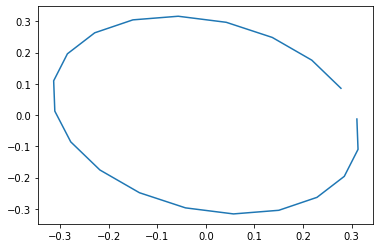

In [ ]:
x, y = alg(x0, y0, 1000)
plt.plot(x, y)
plt.show()

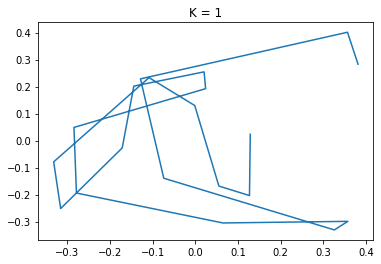

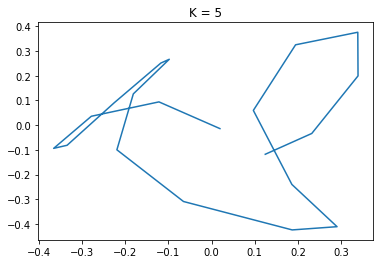

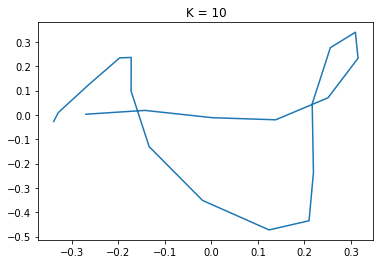

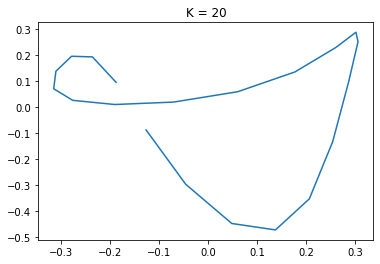

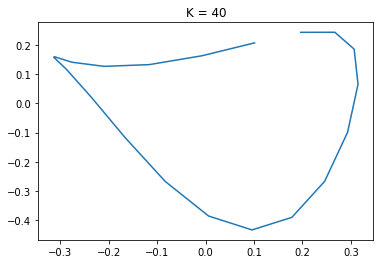

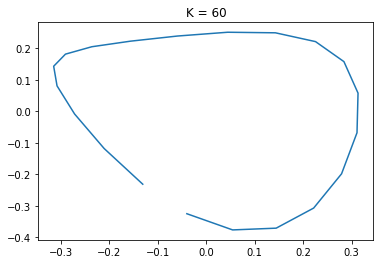

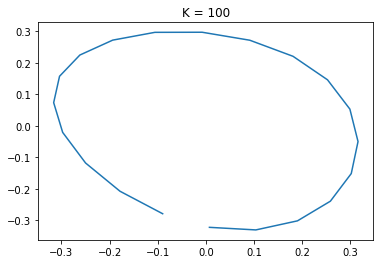

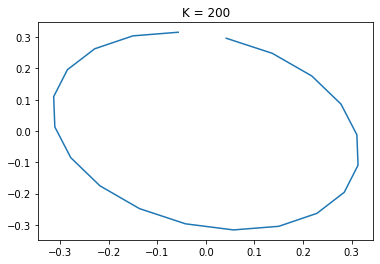

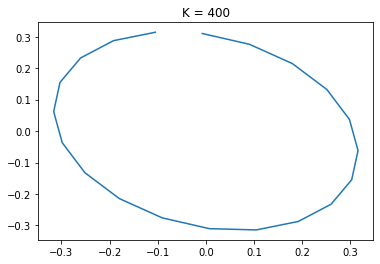

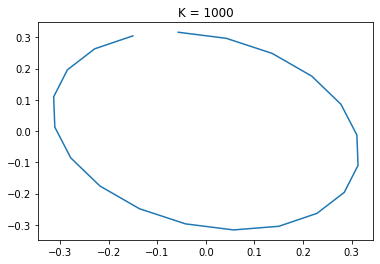

In [ ]:
for k in [1, 5, 10, 20, 40, 60, 100, 200, 400, 1000]:
    x, y = [0, 0]
    x, y = alg(x0, y0, k)
    plt.plot(x, y)
    plt.title("K = {}".format(k))
    plt.show()

## Part (b):

$x$ and $y$ are 2 n-vectors whose components sum to zero, and $P(x, y)$ is the polygon obtained by connecting $(x_{1}, y_{1}),..., (x_{n}, y_{n}), (x_{1}, y_{1})$ in order. We obtain $\hat{P}(x, y)$, the normalized average of $P(x, y)$, by connecting the midpoints of its edges and then normalizing the resulting vertex vectors $\hat{x}$ and $\hat{y}$. 
When repeating this process for $K$ iterations starting with $P0 = P(x^{(0)}, y^{(0)})$, then in the limit the vertices of the polygon iterates $P(x^{(k)}, y^{(k)})$ converge to an ellipse $\epsilon$ that is centered at the origin and whose semiaxes are tilted forty-five degrees from the coordinate axes.

## Part (c):

In scalar terms, an individual midpoint computation involves the averaging of two $x$-values and the averaging of two $y$-values, e.g.,

$$\hat{x_3} = \frac{x_3 + x_4}{2}$$ $$\hat{y_3} = \frac{y_3 + y_4}{2}$$

In vector terms, the mission of the above loop is to average the x-vector with its upshift and the y-vector with its upshift. For N=5, 

$$
\left[\begin{array}{c}
\widehat{x}_{1} \\
\widehat{x}_{2} \\
\widehat{x}_{3} \\
\widehat{x}_{4} \\
\widehat{x}_{5}
\end{array}\right]=\frac{1}{2}\left[\begin{array}{l}
x_{1}+x_{2} \\
x_{2}+x_{3} \\
x_{3}+x_{4} \\
x_{4}+x_{5} \\
x_{5}+x_{1}
\end{array}\right] \quad\left[\begin{array}{c}
\widehat{y}_{1} \\
\widehat{y}_{2} \\
\widehat{y}_{3} \\
\widehat{y}_{4} \\
\hat{y}_{5}
\end{array}\right]=\frac{1}{2}\left[\begin{array}{l}
y_{1}+y_{2} \\
y_{2}+y_{3} \\
y_{3}+y_{4} \\
y_{4}+y_{5} \\
y_{5}+y_{1}
\end{array}\right]
$$

We use the term “upshift” because the vector components move up one notch with the top component wrapping around to the bottom. Because these transformations are linear, they can be described as matrix-vector products:
$$
\widehat{x}=\left[\begin{array}{l}
\widehat{x}_{1} \\
\widehat{x}_{2} \\
\widehat{x}_{3} \\
\widehat{x}_{4} \\
\widehat{x}_{5}
\end{array}\right]=\frac{1}{2}\left[\begin{array}{l}
x_{1}+x_{2} \\
x_{2}+x_{3} \\
x_{3}+x_{4} \\
x_{4}+x_{5} \\
x_{5}+x_{1}
\end{array}\right]=\frac{1}{2}\left[\begin{array}{lllll}
1 & 1 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 1 & 1 \\
1 & 0 & 0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \\
x_{5}
\end{array}\right] \equiv \frac{1}{2}M_{5}x
$$

$$
\widehat{y}=\left[\begin{array}{l}
\widehat{y}_{1} \\
\widehat{y}_{2} \\
\hat{y}_{3} \\
\widehat{y}_{4} \\
\hat{y}_{5}
\end{array}\right]=\frac{1}{2}\left[\begin{array}{l}
y_{1}+y_{2} \\
y_{2}+y_{3} \\
y_{3}+y_{4} \\
y_{4}+y_{5} \\
y_{5}+y_{1}
\end{array}\right]=\frac{1}{2}\left[\begin{array}{lllll}
1 & 1 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 1 & 1 \\
1 & 0 & 0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
y_{1} \\
y_{2} \\
y_{3} \\
y_{4} \\
y_{5}
\end{array}\right] \equiv \frac{1}{2}M_{5} y
$$



So, in general, the transition from $P$ to its average $\hat{P}$ requires the multiplications:

$$\widehat{x}=\frac{1}{a}M_{n} x$$
$$
\widehat{y}=\frac{1}{b}M_{n} y
$$
where
$$
M_{n}=\left[\begin{array}{cccccc}
1 & 1 & 0 & \cdots & 0 & 0 \\
0 & 1 & 1 & \cdots & 0 & 0 \\
\vdots & \vdots & \ddots & \ddots & & \vdots \\
\vdots & \vdots & & \ddots & 1 & \vdots \\
0 & 0 & \cdots & & 1 & 1 \\
1 & 0 & \cdots & \cdots & 0 & 1
\end{array}\right]
$$
and 
$$a=2, b=2$$

We refer to $M_n$ as the averaging matrix and the vectors $x$, $y$, $\hat{x}$, and $\hat{y}$ as vertex vectors.
The notation $P(x, y)$ is used to denote the polygon defined by the vertex vectors $x$
and $y$. After $k$ averaging steps, we have the polygon $P((\frac{1}{2}M_n)^k
 x^k, (\frac{1}{2}M_n)^k
y^k)$.

## Part (d):

Define the n-by-n upshift matrix $S_n$ by:
$$
S_{n}=\left[\begin{array}{l|l|l|l|l}
e_{n} & e_{1} & e_{2} & \cdots & e_{n-1}
\end{array}\right]
$$
where $e_k$ is the $k$th column of the n-by-n identity matrix $I_n$, e.g.,
$$
S_{5}=\left[\begin{array}{lllll}
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 0
\end{array}\right]
$$

We see that the averaging matrix $M_n$ is given by:
$$
M_{n}=\frac{1}{2}\left(I_{n}+S_{n}\right)
$$
The eigensystem of $S_n$ is completely known and involves the nth roots of unity:
$$
\omega_{j}=\cos \left(\frac{2 \pi j}{n}\right)+i \cdot \sin \left(\frac{2 \pi j}{n}\right) \quad j=0: n-1
$$

Using the fact that $
\omega_{j}^{n}=1$, it is easy to verify for $j=0: n-1$:
$$
v_{j}=\sqrt{1 / n}\left[\begin{array}{c}
1 \\
\omega_{j} \\
\omega_{j}^{2} \\
\vdots \\
\omega_{j}^{n-1}
\end{array}\right]
$$
satisfies $
S_{n} v_{j}=\omega_{j} v_{j}
$.

---

<u>**(Part e):**</u>  
Moreover, $
v_{0}, \ldots, v_{n-1}
$ are mutually orthogonal. To see this we observe that:
$$
v_{i}^{H} S_{n} v_{j}=v_{i}^{H}\left(S_{n} v_{j}\right)=\omega_{j} v_{i}^{H} v_{j}
$$
On the other hand, since $
S_{n}^{H}=S_{n}^{T}=S_{n}^{-1}
$ we also have:
$$
\begin{array}{l}
v_{i}^{H} S_{n} v_{j}=\left(v_{i}^{H} S_{n}\right) v_{j}=\left(S_{n}^{-1} v_{i}\right)^{H} v_{j}=\left(v_{i} / \omega_{i}\right)^{H} v_{j}=\omega_{i} v_{i}^{H} v_{j}\\
\end{array}
$$
It follows that $v_{i}^{H} v_{j}=0$ if $i\neq j$. The “H” superscript indicates Hermitian transpose

---

The averaging matrix $M_n =
\frac{(I_n + S_n)}{2}$ has the same eigenvectors as $S_n$. Its eigenvalues $\lambda_1,...,\lambda_n$ are given by:

$
\lambda_{1}=(1+\omega_{0})/ 2 = 1 
$  
$
\lambda_{2}=(1+\omega_{1})/2 = (1+\cos (2 \pi / n)+i \cdot \sin (2 \pi / n)) / 2 
$

$
\lambda_{3}= (1+\omega_{n-1})/2= \bar{\lambda}_{2}
$

$
\lambda_{4}=(1+\omega_{2}) / 2 = (1+\cos (4 \pi / n)+i \cdot \sin (4 \pi / n)) / 2
$

$
\lambda_{5} = (1+\omega_{n-2}) / 2 = \bar{\lambda}_{4}
$
 
$
\vdots
$

$
\lambda_{n}=(1+\omega_{m}) / 2 = \left(1+e^{i 2 \pi n / N}\right) / 2
$

where $m = floor(n/2)$. We have chosen to order the eigenvalues this way because it groups together complex conjugate eigenvalue pairs. The
$\lambda_i$ are on a circle in the complex plane that has center $(0.5,0.0)$ and diameter one.
Moreover,
$$
\left|\lambda_{1}\right|>\left|\lambda_{2}\right|=\left|\lambda_{3}\right|>\ldots>\left|\lambda_{n-1}\right| \geq\left|\lambda_{n}\right|
$$

Let $z_1,...,z_n$ be a reordering of the eigenvectors $v_0,...,v_{n−1}$ so that:
$$
M_{n} z_{k}=\lambda_{k} z_{k} \quad k=1: n
$$

## Part (e):

A unit vector $w ∈ C^n$ whose components sum to
zero is said to have centroid zero. It has an eigenvector expansion of the form:
$$
w=\gamma_{2} z_{2}+\cdots+\gamma_{n} z_{n}
$$
where $\left|\gamma_{2}\right|^{2}+\cdots+\left|\gamma_{n}\right|^{2}=1$. This is because $\left\{z_{1}, \ldots, z_{n}\right\}$ is an **orthonormal basis**, $z_{1}$ is a multiple of $e$, and a centroid zero vector $w$ satisfies $e^{T} w=0 .$ 

## Part (f):

Let's define a real subspace $\mathcal{D}_{2}$: $$
\mathcal{D}_{2}=\operatorname{span}\left\{\operatorname{Re}\left(z_{2}\right), \operatorname{Im}\left(z_{2}\right)\right\}=\operatorname{span}\left\{\operatorname{Re}\left(z_{3}\right), \operatorname{Im}\left(z_{3}\right)\right\}
$$
This subspace is an invariant subspace of $M_n$.

The real and imaginary parts of the
eigenvector $z_2$ (and its conjugate $z_3$) are highly structured. If
$$
\tau=\left[\begin{array}{c}
0 \\
2 \pi / n \\
4 \pi / n \\
\vdots \\
2(n-1) \pi / n
\end{array}\right]
$$

then in vector notation1, $
z_{2}=(\cos (\tau)+i \cdot \sin (\tau)) / \sqrt{n} \text { . }
$ Using elementary trigonometric identities, it is easy to show that:
$$
\begin{array}{l}
\cos (\tau)^{T} \cos (\tau)=\sum_{j=1}^{n} \cos \left(\tau_{j}\right)^{2}=\sum_{j=1}^{n}\left(1+\cos \left(2 \tau_{j}\right)\right) / 2=n / 2, \\
\sin (\tau)^{T} \sin (\tau)=\sum_{j=1}^{n} \sin \left(\tau_{j}\right)^{2}=\sum_{j=1}^{n}\left(1-\cos \left(2 \tau_{j}\right)\right) / 2=n / 2
\end{array}
$$
and
$$
\sin (\tau)^{T} \cos (\tau)=\sum_{j=1}^{n} \sin \left(\tau_{j}\right) \cos \left(\tau_{j}\right)=\sum_{j=1}^{n} \sin \left(2 \tau_{j}\right) / 2=0
$$
It follows that the vectors
$$
c=\sqrt{2 / n}\left[\begin{array}{c}
\cos \left(\tau_{1}\right) \\
\cos \left(\tau_{2}\right) \\
\vdots \\
\cos \left(\tau_{n}\right)
\end{array}\right] \quad s=\sqrt{2 / n}\left[\begin{array}{c}
\sin \left(\tau_{1}\right) \\
\sin \left(\tau_{2}\right) \\
\vdots \\
\sin \left(\tau_{n}\right)
\end{array}\right]
$$
form a real orthonormal basis for $\mathcal{D}_{2}$.

Because they are orthogonal to $z_1$ (a multiple of the vector of all ones), the initial vertex vectors $x^(0)$ and $y^(0)$ can be expressed as a linear combination of the orthonormal vectors ${c, s, z_4,..., z_n}$:
$$
\begin{array}{l}
x^{(0)}=\alpha_{1} c+\alpha_{2} s+\text { vector in } \operatorname{span}\left\{z_{4}, \ldots, z_{n}\right\} \\
y^{(0)}=\beta_{1} c+\beta_{2} s+\text { vector in span }\left\{z_{4}, \ldots, z_{n}\right\}
\end{array}
$$
It follows that for large $k$
$$
\begin{aligned}
x^{(k)} &=u^{(k)}+O\left(\rho_{n}^{k}\right) \\
y^{(k)} &=v^{(k)}+O\left(\rho_{n}^{k}\right)
\end{aligned}
$$

where $u^{(k)}$ and $v^{(k)}$ are the unit vectors
$$
u^{(k)}=\frac{\alpha_{1} M_{n}^{k} c+\alpha_{2} M_{n}^{k} s}{\left\|\alpha_{1} M_{n}^{k} c+\alpha_{2} M_{n}^{k} s\right\|_{2}}
$$
$$
v^{(k)}=\frac{\beta_{1} M_{n}^{k} c+\beta_{2} M_{n}^{k} s}{\left\|\beta_{1} M_{n}^{k} c+\beta_{2} M_{n}^{k} s\right\|_{2}}
$$

Note that these vectors are in the subspace $\mathcal{D}_{2}$. Our plan is to study the polygon sequence $\left\{\mathcal{P}\left(u^{(k)}, v^{(k)}\right)\right\}$ since its limiting behavior coincides with limiting behavior of the polygon sequence $\left\{\mathcal{P}\left(x^{(k)}, y^{(k)}\right)\right\}$.

We now show that for all $i$ and $k$, the points $\left(u_{i}^{(k)}, v_{i}^{(k)}\right)$ in Algorithm 3 are on the same ellipse $\mathcal{E}$ and that $\mathcal{E}$ has a forty-five degree tilt. We refer to this limiting ellipse as the $\mathcal{D}_{2}$ ellipse since it depends upon the vertex vector projections into that invariant subspace.
As $t$ ranges over all real values, the set of points $(u(t), v(t))$ given by
$$
\left[\begin{array}{l}
u(t) \\
v(t)
\end{array}\right]=\left[\begin{array}{cc}
\cos (\phi) & -\sin (\phi) \\
\sin (\phi) & \cos (\phi)
\end{array}\right]\left[\begin{array}{cc}
\sigma_{1} & 0 \\
0 & \sigma_{2}
\end{array}\right]\left[\begin{array}{c}
\cos (t) \\
\sin (t)
\end{array}\right]
$$
define an ellipse with center $(0,0)$, tilt $\phi$, and semiaxes $\left|\sigma_{1}\right|$ and $\left|\sigma_{2}\right| .$ It is obtained by rotating the ellipse
$$
\left(\frac{u}{\sigma_{1}}\right)^{2}+\left(\frac{v}{\sigma_{2}}\right)^{2}=1
$$
counterclockwise $\phi$ radians. 

---